In [2]:
#Pertemuan 12: Data Cleaning and Preparation using Pandas

import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)

After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


<ipython-input-2-414fe4fc40f5>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-414fe4fc40f5>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [3]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


In [4]:
#Load a dataset of your choice and identify missing values.
from google.colab import files
uploaded = files.upload()

Saving fatalities_isr_pse_conflict_2000_to_2023.csv to fatalities_isr_pse_conflict_2000_to_2023.csv


In [5]:
#Load a dataset of your choice and identify missing values.
import pandas as pd
data = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

#Identifikasi kolom yang nilainya hilang
missing_values = data.isnull().sum()
print(missing_values)

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64


In [6]:
# Filling missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['gender'].fillna('Tidak Diketahui', inplace=True)
data['type_of_injury'].fillna('Tidak Diketahui', inplace=True)
data['took_part_in_the_hostilities'].fillna('Tidak Diketahui', inplace=True)
data['ammunition'].fillna('Tidak Diketahui', inplace=True)
data['notes'].fillna('Tidak Ada Catatan', inplace=True)


# Menghapus baris dengan nilai hilang pada kolom kritis
data.dropna(subset=['place_of_residence'], inplace=True)

# Hasil setelah pembersihan
print('Setelah pembersihan:\n', data.head())
print('\nJumlah nilai hilang per kolom setelah pembersihan:\n', data.isnull().sum())

Setelah pembersihan:
                                           name date_of_event   age  \
0  'Abd a-Rahman Suleiman Muhammad Abu Daghash    2023-09-24  32.0   
1         Usayed Farhan Muhammad 'Ali Abu 'Ali    2023-09-24  21.0   
2             'Abdallah 'Imad Sa'ed Abu Hassan    2023-09-22  16.0   
3             Durgham Muhammad Yihya al-Akhras    2023-09-20  19.0   
4                 Raafat 'Omar Ahmad Khamaisah    2023-09-19  15.0   

   citizenship     event_location event_location_district  \
0  Palestinian     Nur Shams R.C.                 Tulkarm   
1  Palestinian     Nur Shams R.C.                 Tulkarm   
2  Palestinian           Kfar Dan                   Jenin   
3  Palestinian  'Aqbat Jaber R.C.                 Jericho   
4  Palestinian         Jenin R.C.                   Jenin   

  event_location_region date_of_death gender took_part_in_the_hostilities  \
0             West Bank    2023-09-24      M              Tidak Diketahui   
1             West Bank    2023-09-2

<ipython-input-6-dc357f606256>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
<ipython-input-6-dc357f606256>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Terapkan Min-Max Scaling
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Kolom numerik setelah Min-Max Scaling:")
print(data[numerical_columns].head())


Kolom numerik setelah Min-Max Scaling:
        age
0  0.279279
1  0.180180
2  0.135135
3  0.162162
4  0.126126


In [8]:
# Standarisasi kolom kategori
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    data[column] = data[column].str.lower()
    data[column] = data[column].str.strip()

print("Kolom kategori setelah standarisasi:\n", data[categorical_columns].head())


Kolom kategori setelah standarisasi:
                                           name date_of_event  citizenship  \
0  'abd a-rahman suleiman muhammad abu daghash    2023-09-24  palestinian   
1         usayed farhan muhammad 'ali abu 'ali    2023-09-24  palestinian   
2             'abdallah 'imad sa'ed abu hassan    2023-09-22  palestinian   
3             durgham muhammad yihya al-akhras    2023-09-20  palestinian   
4                 raafat 'omar ahmad khamaisah    2023-09-19  palestinian   

      event_location event_location_district event_location_region  \
0     nur shams r.c.                 tulkarm             west bank   
1     nur shams r.c.                 tulkarm             west bank   
2           kfar dan                   jenin             west bank   
3  'aqbat jaber r.c.                 jericho             west bank   
4         jenin r.c.                   jenin             west bank   

  date_of_death gender took_part_in_the_hostilities place_of_residence  \
0   

In [9]:
# Tampilkan data yang duplikat
duplicate_data = data[data.duplicated()]

# Menampilkan baris yang duplikat
print("Data yang duplikat:")
print(duplicate_data)


Data yang duplikat:
Empty DataFrame
Columns: [name, date_of_event, age, citizenship, event_location, event_location_district, event_location_region, date_of_death, gender, took_part_in_the_hostilities, place_of_residence, place_of_residence_district, type_of_injury, ammunition, killed_by, notes]
Index: []


In [10]:
#Hapus Duplikasi
#Cek jumlah duplikat
print("Jumlah duplikat sebelum dihapus:", data.duplicated().sum())

#Hapus duplikat
data = data.drop_duplicates()

print("Jumlah duplikat setelah dihapus:", data.duplicated().sum())


Jumlah duplikat sebelum dihapus: 0
Jumlah duplikat setelah dihapus: 0


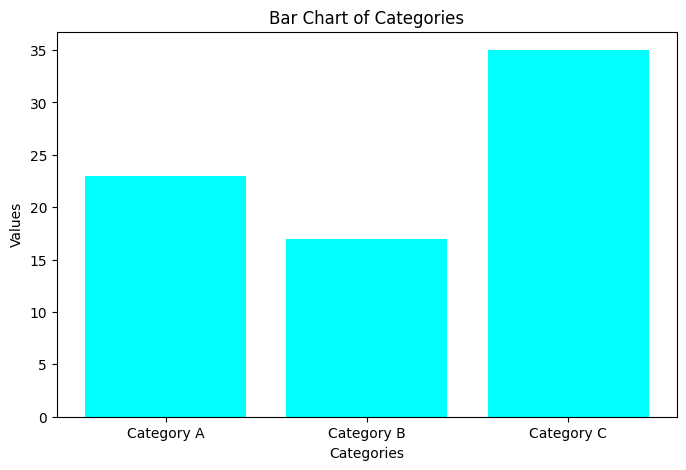

In [11]:
#Pertemuan 13: Data Visualization using Matplotlib and Seaborn
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


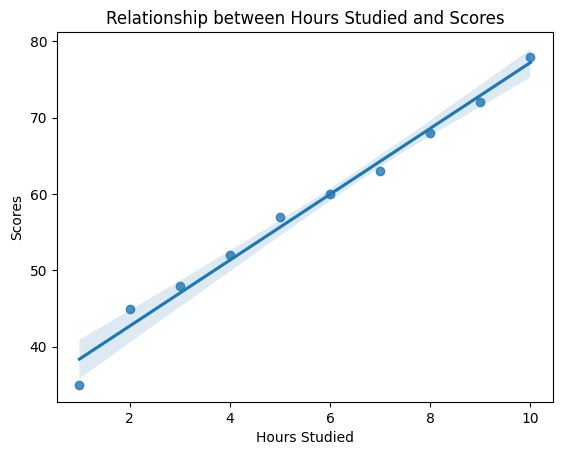

In [12]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


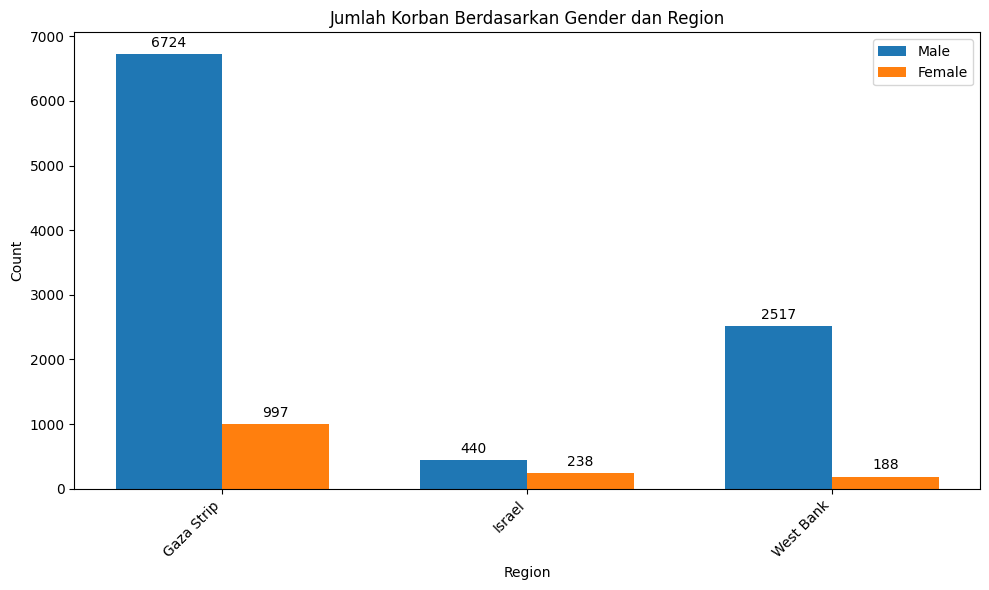

In [24]:
#Use Matplotlib to create a multi-bar chart to compare data across groups.
import numpy as np
import matplotlib.pyplot as plt

grouped_data = data.groupby(['event_location_region', 'gender']).size().unstack(fill_value=0)

# Data untuk plot
categories = grouped_data.index
men_counts = grouped_data['M']
women_counts = grouped_data['F']

# Plot ulang
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, men_counts, width, label='Male')
bar2 = ax.bar(x + width/2, women_counts, width, label='Female')

# Tambahkan label
ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_title('Jumlah Korban Berdasarkan Gender dan Region')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Tambahkan nilai di atas batang
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


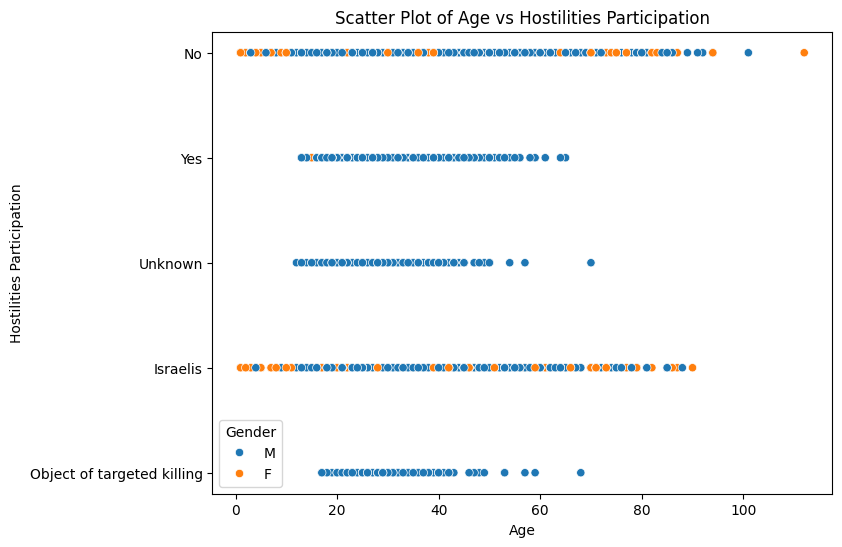

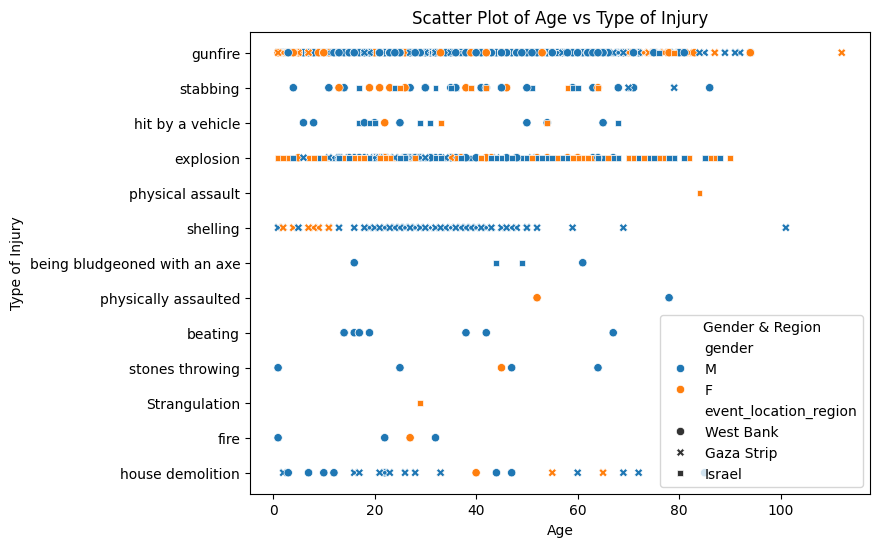

In [25]:
#Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot antara dua variabel numerik
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='took_part_in_the_hostilities', hue='gender')
plt.title('Scatter Plot of Age vs Hostilities Participation')
plt.xlabel('Age')
plt.ylabel('Hostilities Participation')
plt.legend(title='Gender')
plt.show()

# Scatter plot lain: Hubungan antara 'age' dan 'type_of_injury' (jika numerik)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='type_of_injury', hue='gender', style='event_location_region')
plt.title('Scatter Plot of Age vs Type of Injury')
plt.xlabel('Age')
plt.ylabel('Type of Injury')
plt.legend(title='Gender & Region')
plt.show()


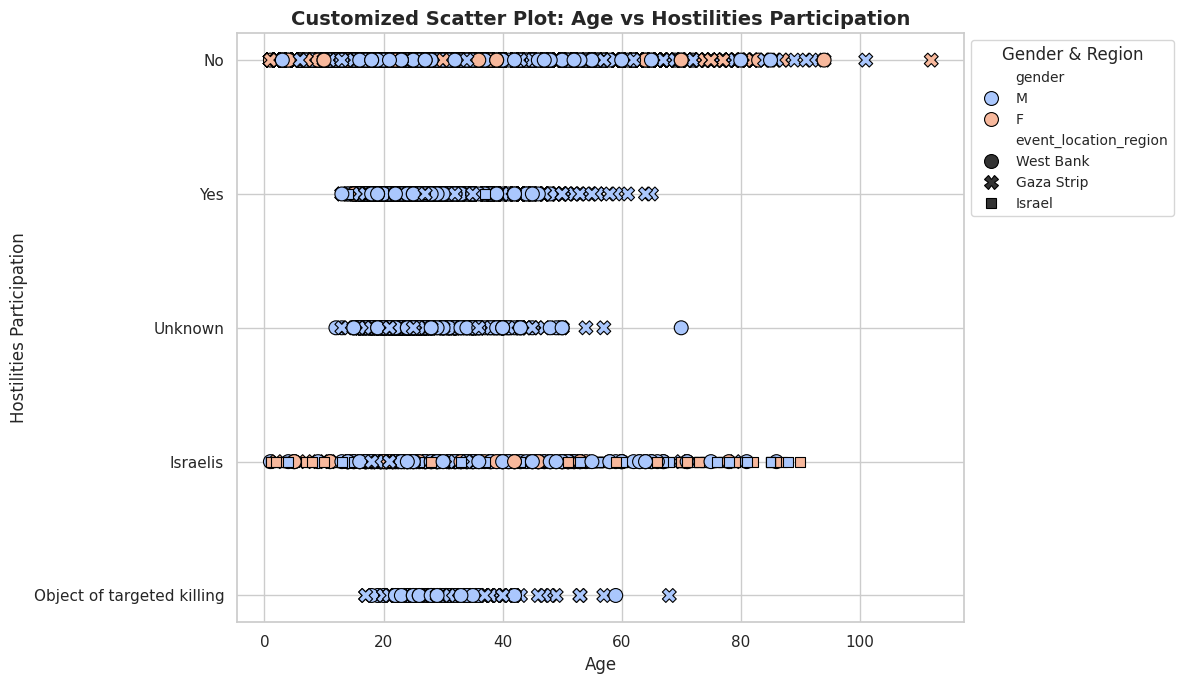

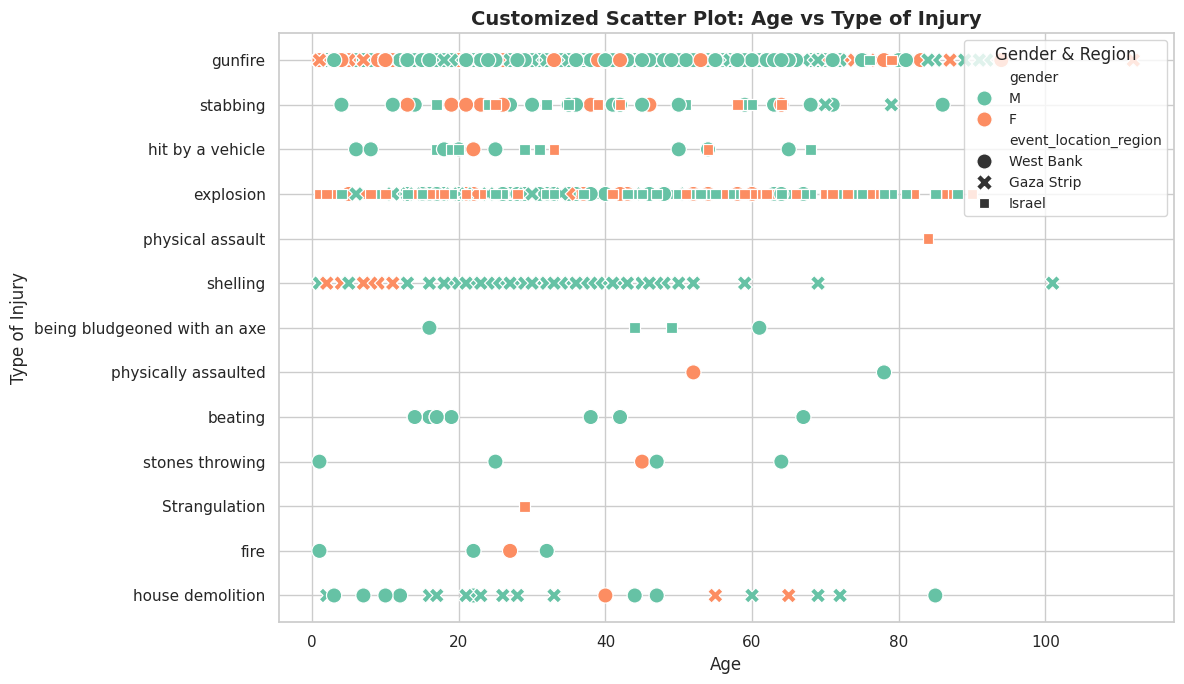

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih tema Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=data,
    x='age',
    y='took_part_in_the_hostilities',
    hue='gender',  # Warna berdasarkan gender
    style='event_location_region',  # Gaya marker berdasarkan region
    palette='coolwarm',  # Skema warna
    s=100,  # Ukuran marker
    edgecolor='black'  # Warna garis tepi marker
)

scatter.set_title('Customized Scatter Plot: Age vs Hostilities Participation', fontsize=14, weight='bold')
scatter.set_xlabel('Age', fontsize=12)
scatter.set_ylabel('Hostilities Participation', fontsize=12)
scatter.legend(title='Gender & Region', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

# Scatter plot kedua dengan warna berbeda
plt.figure(figsize=(12, 7))
scatter2 = sns.scatterplot(
    data=data,
    x='age',
    y='type_of_injury',  # Hubungan dengan variabel lain
    hue='gender',
    style='event_location_region',
    palette='Set2',  # Skema warna alternatif
    s=120,
    edgecolor='white'
)

scatter2.set_title('Customized Scatter Plot: Age vs Type of Injury', fontsize=14, weight='bold')
scatter2.set_xlabel('Age', fontsize=12)
scatter2.set_ylabel('Type of Injury', fontsize=12)
scatter2.legend(title='Gender & Region', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


In [37]:
#Homework 12
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik untuk normalisasi
numerical_columns = ['age', 'took_part_in_the_hostilities']

data['took_part_in_the_hostilities'] = pd.to_numeric(data['took_part_in_the_hostilities'].replace({'No': 0, 'Yes':1}), errors='coerce')
scaler = MinMaxScaler()

# Normalisasi kolom numerik
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Data setelah normalisasi:\n", data[numerical_columns].head())

Data setelah normalisasi:
         age  took_part_in_the_hostilities
0  0.645833                           0.0
1  0.416667                           0.0
2  0.312500                           0.0
3  0.375000                           0.0
4  0.291667                           0.0


In [31]:
# Menghitung IQR untuk menangani outlier
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Batasi nilai outlier (capping)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Terapkan pada kolom numerik
for col in numerical_columns:
    data = handle_outliers(data, col)

print("Data setelah penanganan outlier:\n", data[numerical_columns].describe())


Data setelah penanganan outlier:
                 age  took_part_in_the_hostilities
count  1.099500e+04                   8120.000000
mean   2.232055e-01                      0.426970
std    1.013269e-01                      0.494668
min    8.326673e-17                      0.000000
25%    1.621622e-01                      0.000000
50%    1.981982e-01                      0.000000
75%    2.702703e-01                      1.000000
max    4.324324e-01                      1.000000


In [50]:
!pip install dash plotly pandas


In [40]:
#Homework 13
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Memuat dataset yang telah diunggah
df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

# Cek beberapa baris pertama dataset
df.head()


<ipython-input-40-223b0f6b5f21>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-40-223b0f6b5f21>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [61]:
# Grafik Batang: Jumlah korban berdasarkan gender
fig1 = px.bar(df, x="gender", title="Jumlah Korban Berdasarkan Gender", labels={'gender': 'Gender'})
fig1.update_layout(
    plot_bgcolor='white',  # Warna latar belakang plot
    paper_bgcolor='lightgray',  # Warna latar belakang halaman
    font=dict(color="black"),  # Warna font hitam
    barmode='group'
)

# Scatter Plot: Umur korban vs Lokasi kejadian
fig2 = px.scatter(df, x="age", y="event_location_region", color="gender", title="Umur vs Lokasi Kejadian Berdasarkan Gender", labels={'age': 'Umur', 'event_location_region': 'Lokasi Kejadian'})

# Pie Chart: Distribusi korban berdasarkan jenis luka
fig3 = px.pie(df, names='type_of_injury', title="Distribusi Korban Berdasarkan Jenis Luka", labels={'type_of_injury': 'Jenis Luka'})

# Histogram: Distribusi Umur korban
fig4 = px.histogram(df, x='age', nbins=20, title="Distribusi Umur Korban", labels={'age': 'Umur'})


In [65]:
# Inisialisasi aplikasi Dash
app = dash.Dash(__name__)

# Tata letak dashboard
app.layout = html.Div([
    html.H1("Dashboard Dataset Korban Konflik Israel-Palestina", style={'textAlign': 'center'}),  # Judul dashboard

    # Baris pertama dengan dua grafik: Grafik batang dan scatter plot
    html.Div([
        html.Div([dcc.Graph(figure=fig1)], style={'width': '50%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(figure=fig2)], style={'width': '50%', 'display': 'inline-block'})
    ], style={'display': 'flex'}),

    # Baris kedua dengan pie chart dan histogram
    html.Div([
        html.Div([dcc.Graph(figure=fig3)], style={'width': '50%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(figure=fig4)], style={'width': '50%', 'display': 'inline-block'})
    ], style={'display': 'flex'})
])


In [66]:
# Menjalankan aplikasi
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>